# AI-deteciton using features from images converted to grayscale

### Import libraries and set random state

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

random_state = 123

### Import extracted features

In [3]:
df = pd.read_csv("/kaggle/input/cifake-radiomic-features/features/train_features.csv")
test_data = pd.read_csv("/kaggle/input/cifake-radiomic-features/features/test_features.csv")
df.head()

,Image,Mask,Category,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-2D_gldm_LowGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceEmphasis,lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-2D_ngtdm_Busyness,lbp-2D_ngtdm_Coarseness,lbp-2D_ngtdm_Complexity,lbp-2D_ngtdm_Contrast,lbp-2D_ngtdm_Strength
0,train\FAKE\1000 (10).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
1,train\FAKE\1000 (2).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
2,train\FAKE\1000 (3).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
3,train\FAKE\1000 (4).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
4,train\FAKE\1000 (5).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0


### Preprocess imported data (remove identicall features, divide into train, valifation, test, etc.)

In [4]:
# Drop columns with only one value
for column in df.columns:
    if df[column].min() == df[column].max():
        print(column)
        df.drop(column, axis=1, inplace=True)
        test_data.drop(column, axis=1, inplace=True)
        
df.head()

Mask
diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_shape2D_Elongation
original_shape2D_MajorAxisLength
original_shape2D_MaximumDiameter
original_shape2D_MeshSurface
original_shape2D_MinorAxisLength
original_shape2D_Perimeter
original_shape2D_PerimeterSurfaceRatio
original_shape2D_PixelSurface
original_shape2D_Sphericity
lbp-2D_firstorder_Entropy
lbp-2D_firstorder_Maximum
lbp-2D_firstorder_Minimum
lbp-2D_firs

,Image,Category,diagnostics_Image-original_Hash,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,...,lbp-2D_firstorder_InterquartileRange,lbp-2D_firstorder_Kurtosis,lbp-2D_firstorder_MeanAbsoluteDeviation,lbp-2D_firstorder_Mean,lbp-2D_firstorder_Median,lbp-2D_firstorder_RobustMeanAbsoluteDeviation,lbp-2D_firstorder_RootMeanSquared,lbp-2D_firstorder_Skewness,lbp-2D_firstorder_TotalEnergy,lbp-2D_firstorder_Variance
0,train\FAKE\1000 (10).jpg,0,76ff58ab45bb4445f3e7008325afd64a0a6fe913,73.623047,0.0,196.0,-118.672552,144.502760,10230000.0,3.892567,...,3.25,2.227441,2.084753,4.625977,4.0,1.923228,5.287718,0.112422,28631.0,6.560302
1,train\FAKE\1000 (2).jpg,0,e9d3c440b6fcab5df49a06a9b4173e599d936d36,105.743164,0.0,245.0,-153.512058,120.067508,10230000.0,3.670559,...,3.00,2.392797,1.929277,4.709961,5.0,1.526190,5.294178,0.056640,28701.0,5.844588
2,train\FAKE\1000 (3).jpg,0,6d0cbeab26a3f1725ec97b19d4e1e19f3c7f1103,166.152344,0.0,238.0,-163.028597,68.661590,10230000.0,3.049302,...,4.00,2.269398,2.102133,4.936523,5.0,1.863054,5.620919,-0.199100,32353.0,7.225463
3,train\FAKE\1000 (4).jpg,0,3636837961ccd7f76bbc1da89fdd9613545a10a9,134.160156,0.0,255.0,-143.223191,120.008218,10230000.0,3.870966,...,4.00,2.188788,2.116211,4.718750,4.0,1.955613,5.383170,0.067161,29674.0,6.711914
4,train\FAKE\1000 (5).jpg,0,a76d7b7bf423fc724037252c5b13ca6549a3bb0d,104.945312,0.0,249.0,-117.175465,130.569159,10230000.0,3.736350,...,4.00,1.966022,2.330742,4.790039,5.0,2.144410,5.531603,-0.019212,31333.0,7.654159


In [5]:
# Drop columns related to diagnostics
df.dropna(inplace=True)
test_data.dropna(inplace=True)

X = df.drop(columns=['Category'])
X_test = test_data.drop(columns=['Category'])

for col in X.columns:
    if 'diagnostics' in col:
        X.drop(columns=[col], inplace=True)
        X_test.drop(columns=[col], inplace=True)
        

y = df[['Category']]
y_test = test_data[['Category']]

X.head()

,Image,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,...,lbp-2D_firstorder_InterquartileRange,lbp-2D_firstorder_Kurtosis,lbp-2D_firstorder_MeanAbsoluteDeviation,lbp-2D_firstorder_Mean,lbp-2D_firstorder_Median,lbp-2D_firstorder_RobustMeanAbsoluteDeviation,lbp-2D_firstorder_RootMeanSquared,lbp-2D_firstorder_Skewness,lbp-2D_firstorder_TotalEnergy,lbp-2D_firstorder_Variance
0,train\FAKE\1000 (10).jpg,-118.672552,144.502760,10230000.0,3.892567,157.860084,2.191163,275.977659,85.591657,0.000000e+00,...,3.25,2.227441,2.084753,4.625977,4.0,1.923228,5.287718,0.112422,28631.0,6.560302
1,train\FAKE\1000 (2).jpg,-153.512058,120.067508,10230000.0,3.670559,141.166369,2.317249,239.007683,84.285398,2.664535e-15,...,3.00,2.392797,1.929277,4.709961,5.0,1.526190,5.294178,0.056640,28701.0,5.844588
2,train\FAKE\1000 (3).jpg,-163.028597,68.661590,10230000.0,3.049302,65.831466,4.833481,131.384348,75.346100,-1.776357e-15,...,4.00,2.269398,2.102133,4.936523,5.0,1.863054,5.620919,-0.199100,32353.0,7.225463
3,train\FAKE\1000 (4).jpg,-143.223191,120.008218,10230000.0,3.870966,110.829437,3.152715,222.284014,75.939282,-4.440892e-16,...,4.00,2.188788,2.116211,4.718750,4.0,1.955613,5.383170,0.067161,29674.0,6.711914
4,train\FAKE\1000 (5).jpg,-117.175465,130.569159,10230000.0,3.736350,188.285914,1.687657,237.925162,89.973456,0.000000e+00,...,4.00,1.966022,2.330742,4.790039,5.0,2.144410,5.531603,-0.019212,31333.0,7.654159


In [6]:
columns_left_after_preprocessing = X.columns
saved_columns = np.hstack((X.columns, y.columns))
# we don't want Image column
saved_columns = saved_columns[1:]

In [7]:
# train / val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=random_state)

In [8]:
# Remove 'Image' column (store the information for visualization)
img_train = X_train['Image']
img_val = X_val['Image']
img_test = X_test['Image']

X_train.drop(columns=['Image'], inplace=True)
X_val.drop(columns=['Image'], inplace=True)
X_test.drop(columns=['Image'], inplace=True)

# if you were using different mask for each file you should remove it aswell
if 'Mask' in X.columns:
    mask_train = X_train['Mask']
    mask_val = X_val['Mask']
    mask_test = X_test['Mask']
    
    X_train.drop(columns=['Mask'], inplace=True)
    X_val.drop(columns=['Mask'], inplace=True)
    X_test.drop(columns=['Mask'], inplace=True)


In [9]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model tarining

In [11]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

clfs_names = ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 
              'HistGradientBoostingClassifier','LinearDiscriminantAnalysis']

# tree = DecisionTreeClassifier(random_state=random_state, min_samples_split=100)
# ada = AdaBoostClassifier(random_state=random_state)
# bagging = BaggingClassifier(random_state=random_state)
# boost = GradientBoostingClassifier(random_state=random_state)
forest = RandomForestClassifier(random_state=random_state, min_samples_split=4)
lda = LinearDiscriminantAnalysis()
histBoost = HistGradientBoostingClassifier(random_state=random_state)
linearSVC = LinearSVC()
regression = LogisticRegression()

clfs = [regression, linearSVC, forest, histBoost, lda]
for clf in clfs:
    clf = clf.fit(X_train, y_train)
    print(f"Finished training {clf.__class__.__name__}.")

Finished training LogisticRegression.
Finished training LinearSVC.
Finished training RandomForestClassifier.
Finished training HistGradientBoostingClassifier.
Finished training LinearDiscriminantAnalysis.


In [12]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_train)

results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': []}
ys_pred = {}

for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_train)
    ys_pred[name] = y_pred
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_train, y_pred))
    results['F1 score'].append(f1_score(y_train, y_pred))
    results['Precision'].append(precision_score(y_train, y_pred))
    results['Recall'].append(recall_score(y_train, y_pred))

results_df = pd.DataFrame(results)
print("Performance on TRAINING set")
results_df.head(len(clfs_names))

Performance on TRAINING set


,Name,Accuracy,F1 score,Precision,Recall
0,LogisticRegression,0.854089,0.854892,0.852725,0.857070
1,LinearSVC,0.874311,0.874964,0.873015,0.876922
2,RandomForestClassifier,0.999889,0.999889,0.999867,0.999911
3,HistGradientBoostingClassifier,0.888011,0.888144,0.889734,0.886560
4,LinearDiscriminantAnalysis,0.878367,0.878463,0.880388,0.876545


In [13]:
y_pred = clf.predict(X_val)

results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': []}
ys_pred = {}

for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_val)
    ys_pred[name] = y_pred
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_val, y_pred))
    results['F1 score'].append(f1_score(y_val, y_pred))
    results['Precision'].append(precision_score(y_val, y_pred))
    results['Recall'].append(recall_score(y_val, y_pred))

results_df = pd.DataFrame(results)
print("Performance on VALIDATION set")
results_df.head(len(clfs_names))

Performance on VALIDATION set


,Name,Accuracy,F1 score,Precision,Recall
0,LogisticRegression,0.8518,0.848960,0.842095,0.855939
1,LinearSVC,0.8693,0.866346,0.862202,0.870530
2,RandomForestClassifier,0.8516,0.847764,0.846374,0.849157
3,HistGradientBoostingClassifier,0.8659,0.862363,0.861390,0.863337
4,LinearDiscriminantAnalysis,0.8731,0.869699,0.869074,0.870325


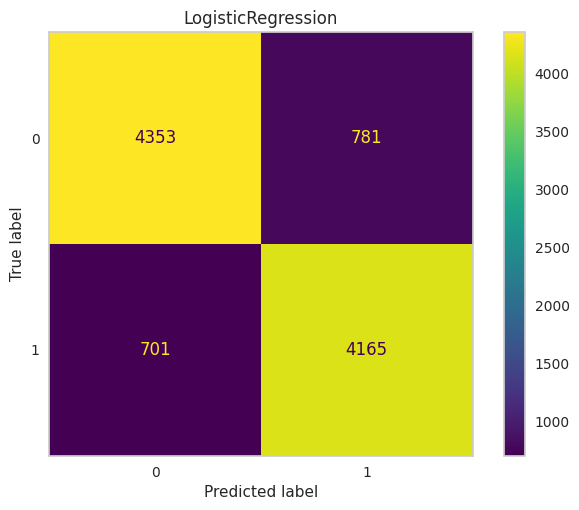

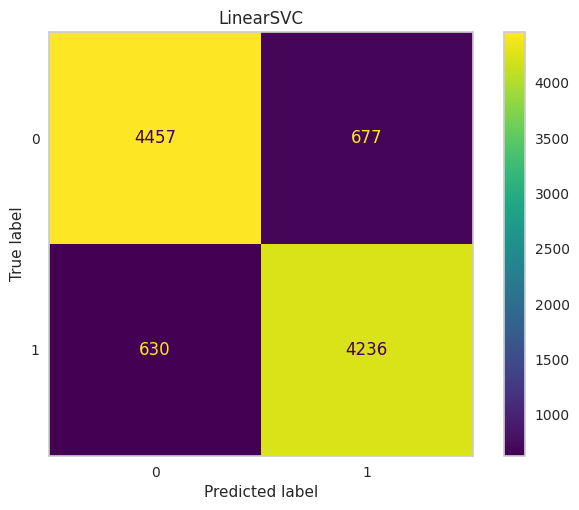

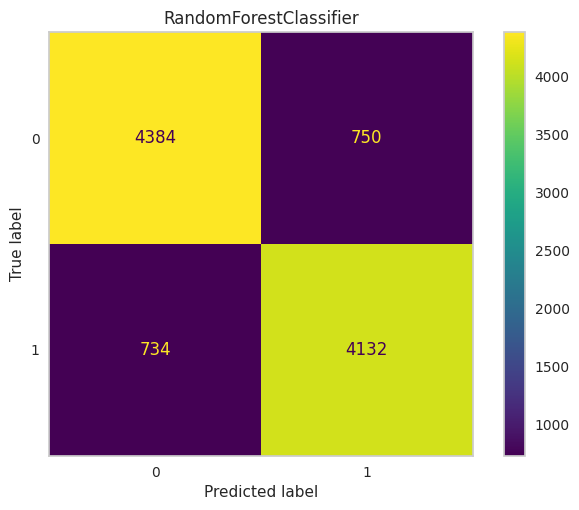

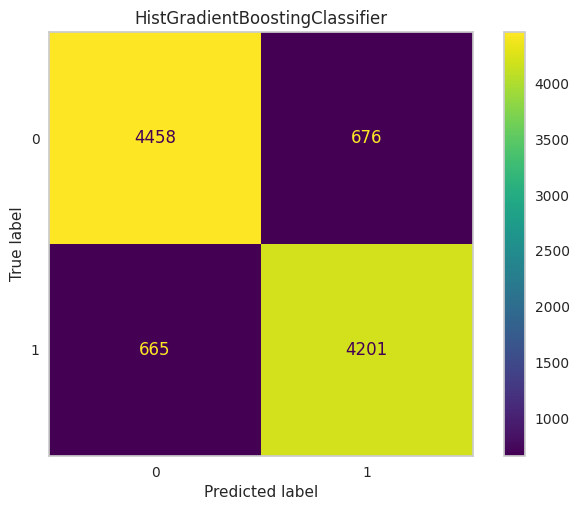

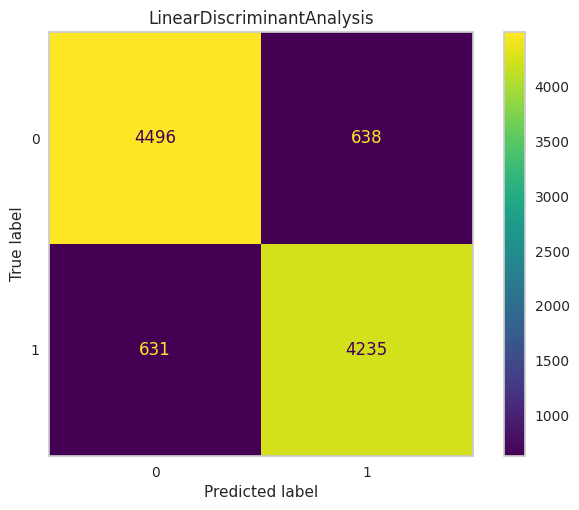

In [14]:
for clf, name in zip(clfs, clfs_names):
    y_pred = ys_pred[name]
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f"{name}")
    plt.grid(False)
    plt.show()

During processing LinearSVC. Exception: 'LinearSVC' object has no attribute 'predict_proba' occurred.


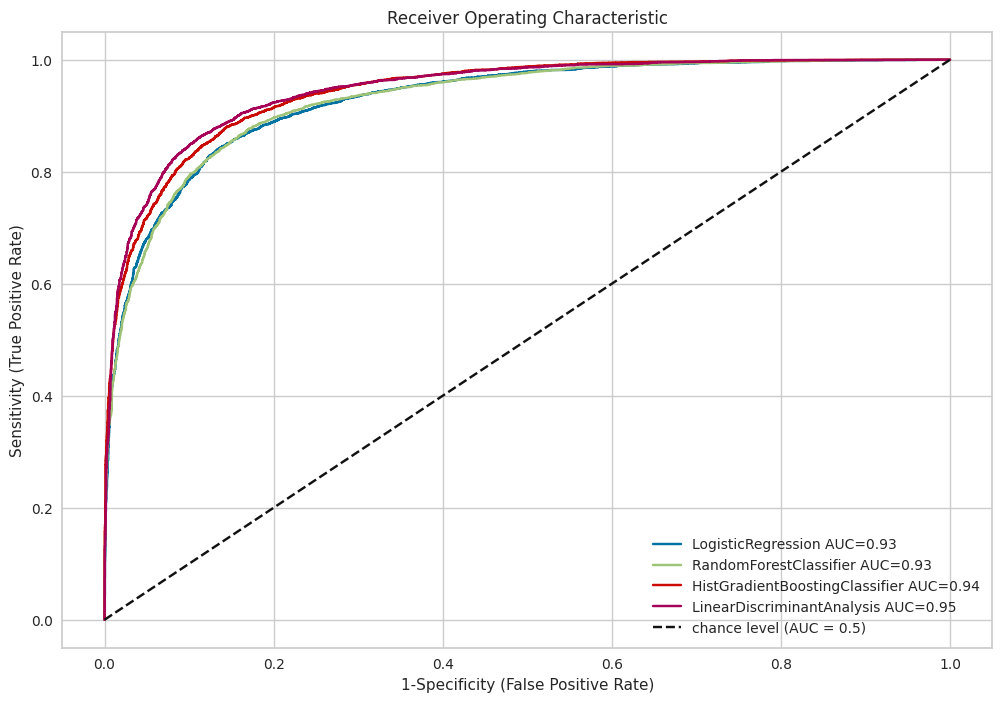

In [15]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
ys_pred_proba = {}
clfs_thresholds = {}
plt.figure(figsize=(12,8))
for clf, name in zip(clfs, clfs_names):
    try:
        y_pred_proba = clf.predict_proba(X_val)
        y_pred_proba = y_pred_proba[:, 1]
        ys_pred_proba[name] = y_pred_proba

        fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        clfs_thresholds[name] = thresholds

        plt.plot(fpr,tpr,label=f"{name} AUC={roc_auc:.2f}"+str())
    except Exception as e:
        print(f"During processing {name}. Exception: {e} occurred.")

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

clfs_importances = dict()

for clf, name in zip(clfs, clfs_names):
    try:
        result = permutation_importance(
            clf, X_val, y_val, n_repeats=10, random_state=random_state, n_jobs=4
        )

        clfs_importances[name] = result

        sorted_importances_idx = result.importances_mean.argsort()[-10:]
        importances = pd.DataFrame(
            result.importances[sorted_importances_idx].T,
            columns=X_train.columns[sorted_importances_idx],
        )
        ax = importances.plot.box(vert=False, whis=10)
        ax.set_title(f"Permutation Importances {name}")
        ax.axvline(x=0, color="k", linestyle="--")
        ax.set_xlabel("Decrease in accuracy score")
        ax.figure.tight_layout()
        plt.show()
    except Exception as e:
        print(f"During processing {name}. Exception: {e} occurred.")

In [17]:
importances.keys()

Index(['wavelet-L_glcm_Correlation', 'gradient_gldm_GrayLevelNonUniformity',
       'original_gldm_HighGrayLevelEmphasis',
       'wavelet-L_firstorder_RobustMeanAbsoluteDeviation',
       'logarithm_glcm_Idmn', 'square_glcm_Idmn', 'squareroot_glcm_Imc2',
       'gradient_glcm_Idmn', 'wavelet-L_glcm_Imc2', 'original_glcm_Idmn'],
      dtype='object')

### Check performance on test data

In [18]:
test_dataset = pd.DataFrame(data=np.hstack((X_test, y_test)), columns=saved_columns)
test_dataset.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,lbp-2D_firstorder_Kurtosis,lbp-2D_firstorder_MeanAbsoluteDeviation,lbp-2D_firstorder_Mean,lbp-2D_firstorder_Median,lbp-2D_firstorder_RobustMeanAbsoluteDeviation,lbp-2D_firstorder_RootMeanSquared,lbp-2D_firstorder_Skewness,lbp-2D_firstorder_TotalEnergy,lbp-2D_firstorder_Variance,Category
0,0.443242,0.591005,0.250,0.968759,0.622495,0.021000,0.241455,0.745525,0.541667,0.417642,...,0.134727,0.536234,0.155541,0.0,0.567708,0.261688,0.601599,0.209507,0.474430,0.0
1,0.462083,0.567504,0.500,0.987504,0.619404,0.025221,0.306269,0.735842,0.500000,0.423841,...,0.069688,0.669088,0.200894,0.2,0.666414,0.336703,0.559752,0.276386,0.607947,0.0
2,0.381378,0.491478,0.500,0.944884,0.685577,0.017359,0.147648,0.790271,0.416667,0.637375,...,0.107529,0.576401,0.137336,0.0,0.489027,0.256071,0.567313,0.204622,0.505545,0.0
3,0.412563,0.464880,0.625,0.964684,0.523161,0.033231,0.304428,0.685042,0.479167,0.565919,...,0.182059,0.439652,0.143085,0.0,0.363385,0.215822,0.638675,0.170113,0.354999,0.0
4,0.600407,0.711141,0.500,0.883682,0.424853,0.038072,0.288242,0.671003,0.458333,0.277109,...,0.108341,0.581513,0.183647,0.0,0.591755,0.296730,0.566668,0.240370,0.516287,0.0


In [19]:
y_pred = clf.predict(X_test)

results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': []}
ys_pred = {}

for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_test)
    ys_pred[name] = y_pred
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1 score'].append(f1_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))

results_df = pd.DataFrame(results)
print("Results WITHOUT threshold adjustment on TEST data")
results_df.head(len(clfs_names))

Results WITHOUT threshold adjustment on TEST data


,Name,Accuracy,F1 score,Precision,Recall
0,LogisticRegression,0.85105,0.851518,0.848852,0.8542
1,LinearSVC,0.86765,0.867947,0.866003,0.8699
2,RandomForestClassifier,0.85310,0.852850,0.854305,0.8514
3,HistGradientBoostingClassifier,0.86765,0.867802,0.866806,0.8688
4,LinearDiscriminantAnalysis,0.87515,0.874931,0.876468,0.8734


In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
    recall_score, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc, RocCurveDisplay

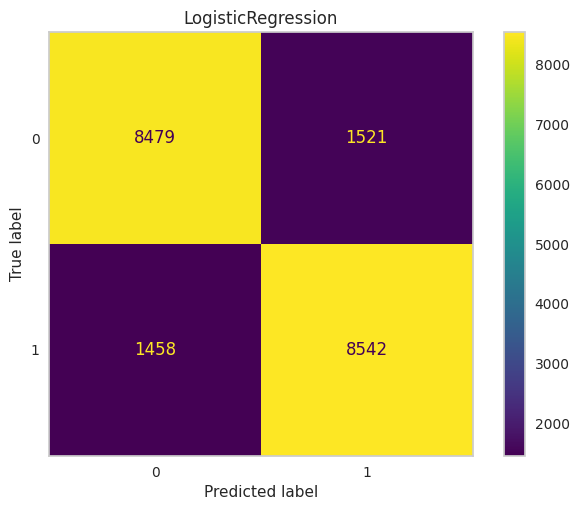

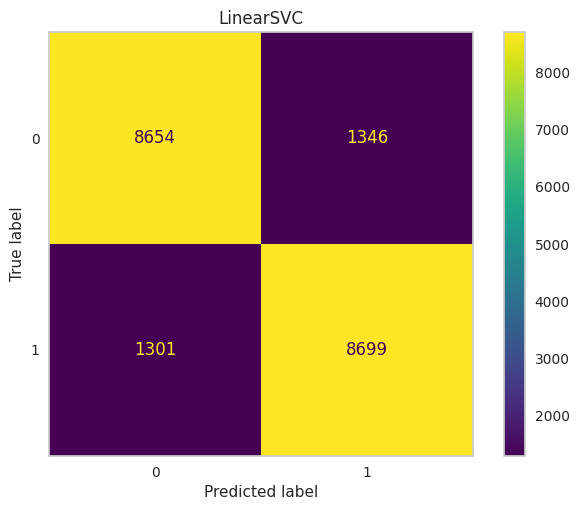

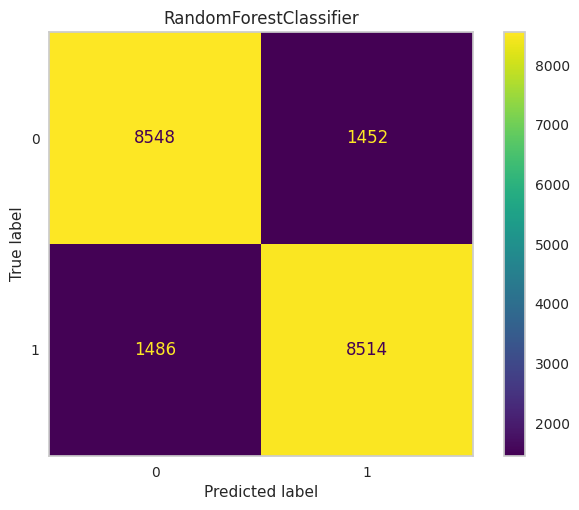

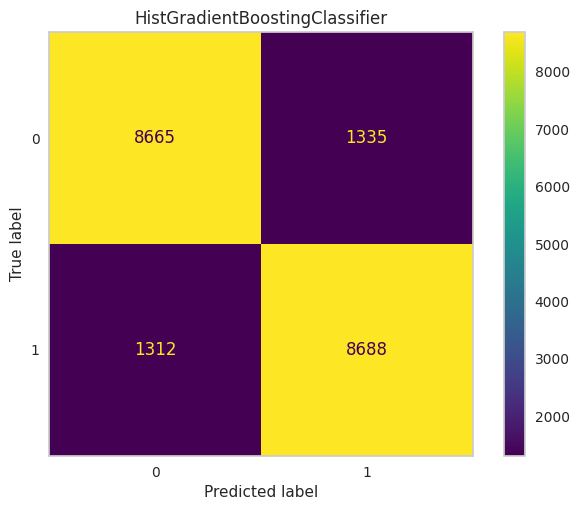

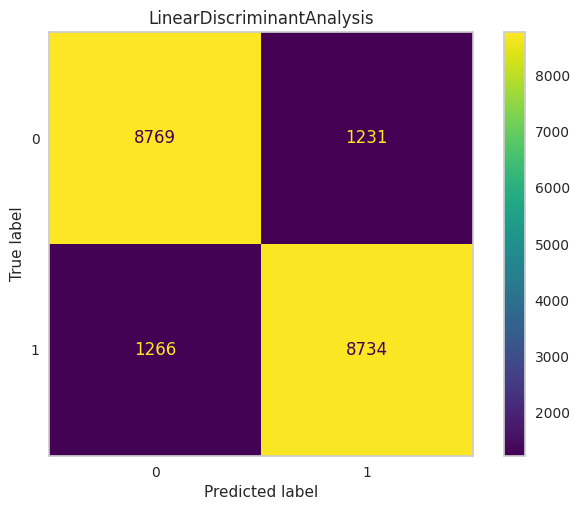

In [21]:
for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_test)
    ys_pred[name] = y_pred
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f"{name}")
    plt.grid(False)
    plt.show()

During processing LinearSVC. Exception: 'LinearSVC' object has no attribute 'predict_proba' occurred.


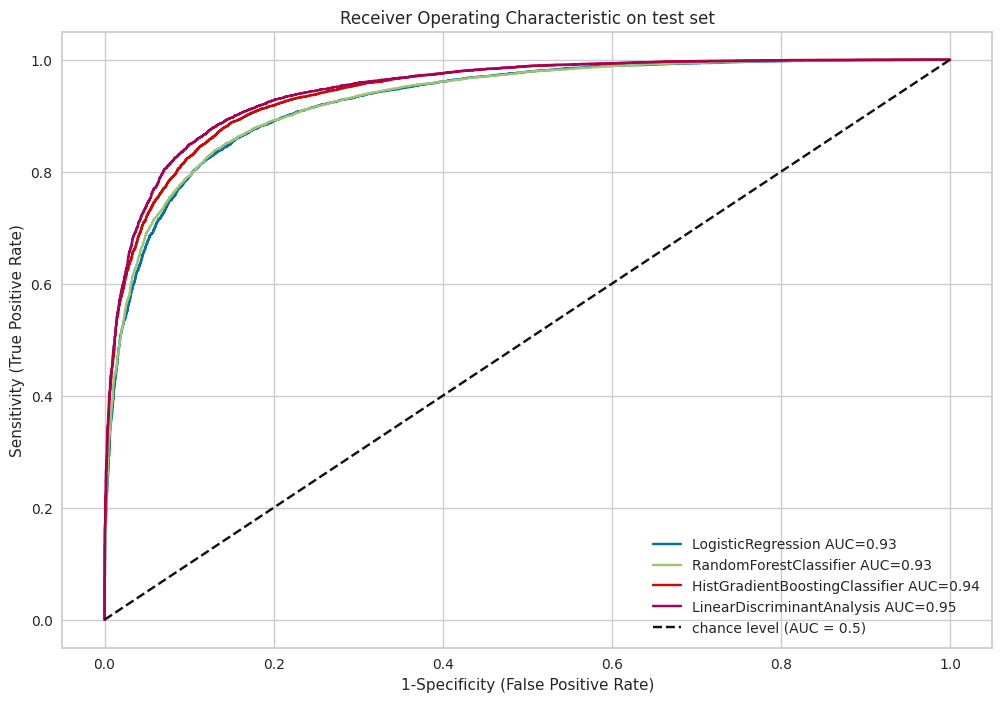

In [22]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
ys_pred_proba = {}
clfs_thresholds = {}
plt.figure(figsize=(12,8))
for clf, name in zip(clfs, clfs_names):
    try:
        y_pred_proba = clf.predict_proba(X_test)
        y_pred_proba = y_pred_proba[:, 1]
        ys_pred_proba[name] = y_pred_proba

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        clfs_thresholds[name] = thresholds

        plt.plot(fpr,tpr,label=f"{name} AUC={roc_auc:.2f}"+str())
    except Exception as e:
        print(f"During processing {name}. Exception: {e} occurred.")

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic on test set')
plt.legend()
plt.show()

# Save importances

In [23]:
import pickle

with open('gray_clfs_importances.pkl', 'wb') as f:
    pickle.dump([clfs_importances], f)

# Save models

In [24]:
import pickle

with open('gray_clfs.pkl', 'wb') as f:
    pickle.dump([clfs], f)

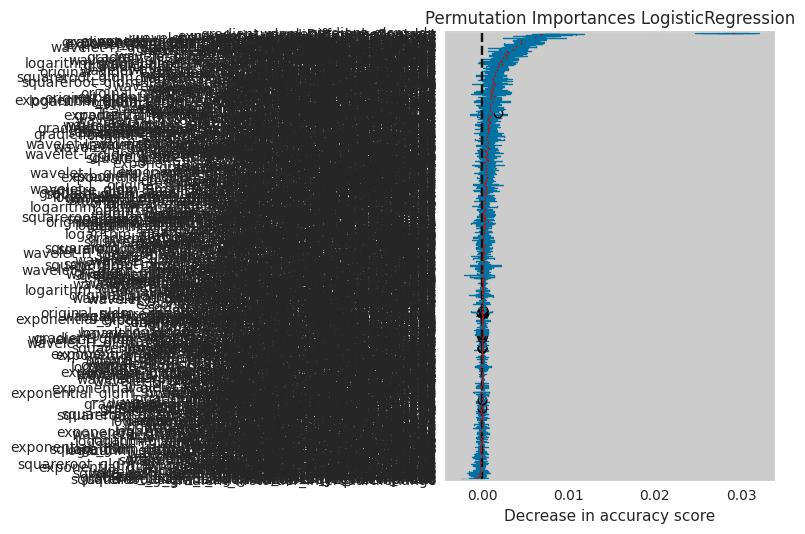

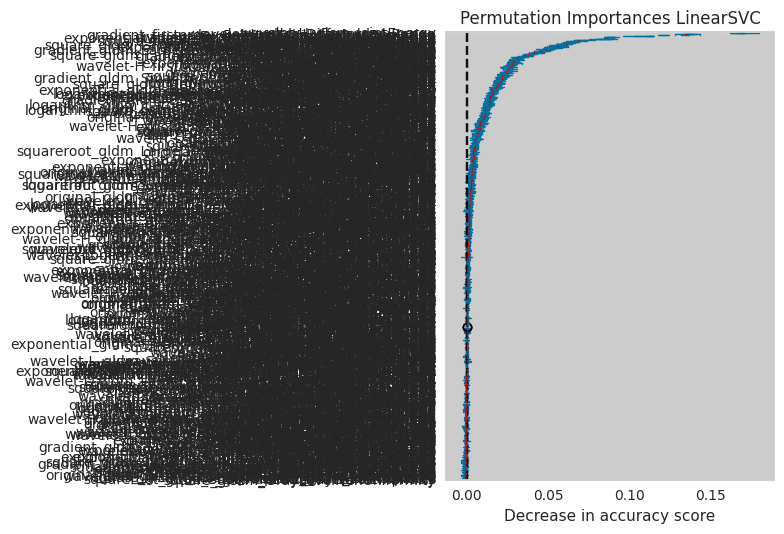

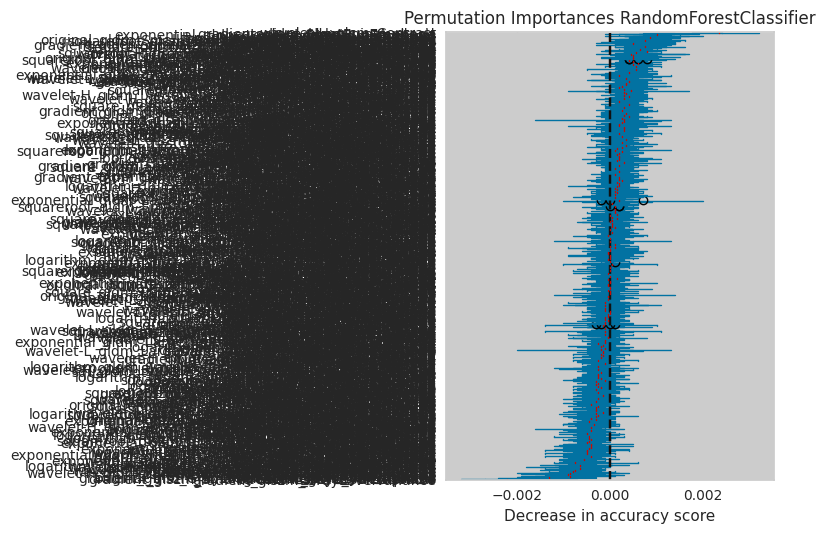

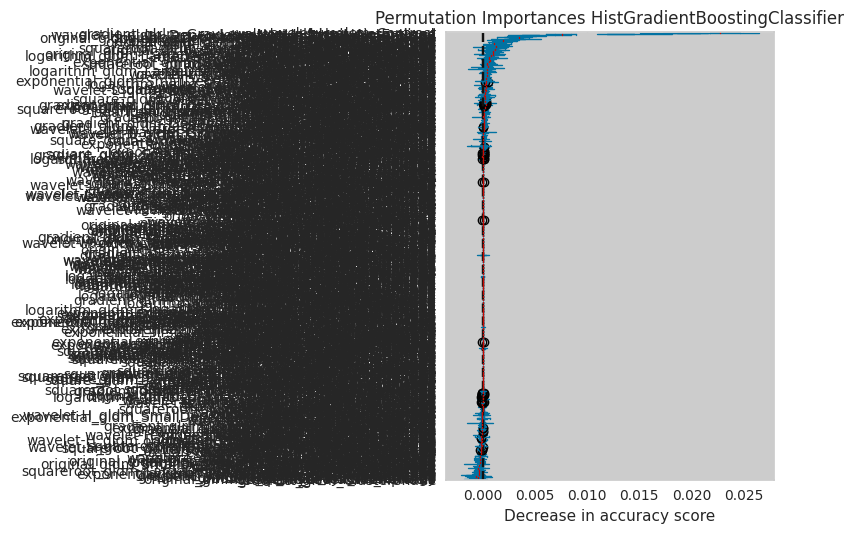

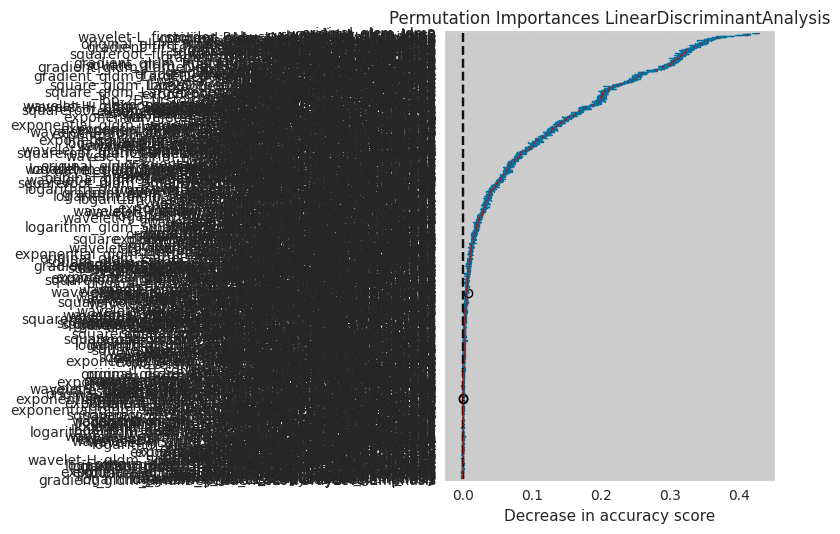

In [25]:
for clf, name in zip(clfs, clfs_names):
    try:
        result = clfs_importances[name]

        sorted_importances_idx = result.importances_mean.argsort()
        importances = pd.DataFrame(
            result.importances[sorted_importances_idx].T,
            columns=X_train.columns[sorted_importances_idx],
        )
        ax = importances.plot.box(vert=False, whis=10)
        ax.set_title(f"Permutation Importances {name}")
        ax.axvline(x=0, color="k", linestyle="--")
        ax.set_xlabel("Decrease in accuracy score")
        ax.figure.tight_layout()
        plt.show()
    except Exception as e:
        print(f"During processing {name}. Exception: {e} occurred.")